In [337]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pydotplus
import seaborn as sns
from IPython.display import Image, display
from six import StringIO
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    accuracy_score,
    classification_report,
    confusion_matrix,
)
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import (
    LabelEncoder,
    OneHotEncoder,
    OrdinalEncoder,
    StandardScaler,
)
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, export_graphviz

3 tipe data

1. Data nominal: data categorical, tidak ada peringkat / urutan / kedudukan (male/female, dogs/cats/elephants, yes/no)
2. Data ordinal: data categorical, memiliki peringkat (low/medium/high, sangat tidak puas/ tidak puas / biasa saja / puas / sangat puas)
3. Data interval (skalar): data numerical, memiliki jarak dalam nilai kontinu (cm, kg, rupiah, jumlah orang, harga)


# Naive Bayes


In [2]:
weather = [
    "Sunny",
    "Sunny",
    "Overcast",
    "Rainy",
    "Rainy",
    "Rainy",
    "Overcast",
    "Sunny",
    "Sunny",
    "Rainy",
    "Sunny",
    "Overcast",
    "Overcast",
    "Rainy",
]

temp = [
    "Hot",
    "Hot",
    "Hot",
    "Mild",
    "Cool",
    "Cool",
    "Cool",
    "Mild",
    "Cool",
    "Mild",
    "Mild",
    "Mild",
    "Hot",
    "Mild",
]

play = [
    "No",
    "No",
    "Yes",
    "Yes",
    "Yes",
    "No",
    "Yes",
    "No",
    "Yes",
    "Yes",
    "Yes",
    "Yes",
    "Yes",
    "No",
]

assert len(weather) == len(temp) == len(play)

## Load Data


In [ ]:
df = pd.DataFrame(zip(weather, temp, play), columns=["weather", "temp", "play"])
df.head()

,weather,temp,play
0,Sunny,Hot,No
1,Sunny,Hot,No
2,Overcast,Hot,Yes
3,Rainy,Mild,Yes
4,Rainy,Cool,Yes


## Feature Engineering


In [ ]:
X = df[["weather", "temp"]]  # features
y = df["play"]  # target label

### Encoding


In [12]:
le = LabelEncoder()
le

LabelEncoder()

In [13]:
le.fit(y)

LabelEncoder()

In [16]:
y_encoded = le.transform(y)

In [17]:
oe = OrdinalEncoder()
oe

OrdinalEncoder()

In [18]:
oe.fit(X, y)

OrdinalEncoder()

In [22]:
X_encoded = oe.transform(X)

## Model Training


In [26]:
model = GaussianNB()
model.fit(X_encoded, y_encoded)

GaussianNB()

In [28]:
y_pred = model.predict(X_encoded)

In [29]:
print(classification_report(y_encoded, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.60      0.60         5
           1       0.78      0.78      0.78         9

    accuracy                           0.71        14
   macro avg       0.69      0.69      0.69        14
weighted avg       0.71      0.71      0.71        14



In [30]:
model.score(X_encoded, y_encoded)

0.7142857142857143

In [31]:
confusion_matrix(y_encoded, y_pred)

array([[3, 2],
       [2, 7]])

In [42]:
df_inf = pd.DataFrame(
    [
        {"weather": "Overcast", "temp": "Mild"},
        {"weather": "Sunny", "temp": "Cool"},
        {"weather": "Rainy", "temp": "Cool"},
    ]
)
df_inf

,weather,temp
0,Overcast,Mild
1,Sunny,Cool
2,Rainy,Cool


In [43]:
X_inf = oe.transform(df_inf)
X_inf

array([[0., 2.],
       [2., 0.],
       [1., 0.]])

In [44]:
model.predict(X_inf)

array([1, 0, 1])

In [37]:
le.classes_

array(['No', 'Yes'], dtype=object)

# Naive Bayes Multiple Labels


## Load Data


In [46]:
wine = datasets.load_wine()

In [47]:
print("Features: ", wine.feature_names)
print("Labels: ", wine.target_names)

Features:  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Labels:  ['class_0' 'class_1' 'class_2']


In [49]:
wine.data.shape

(178, 13)

In [52]:
len(wine.feature_names)

13

In [70]:
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df["target"] = list(map(lambda x: f"class_{x}", wine.target))
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0


## Feature Engineering


In [77]:
X = df.drop("target", axis=1)
y = df["target"]

## Train Test Split


In [83]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=109
)

### Encoding


In [85]:
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

## Model Training


In [86]:
model = GaussianNB()
model.fit(X_train, y_train_encoded)

GaussianNB()

In [88]:
print(model.score(X_train, y_train_encoded))
print(model.score(X_test, y_test_encoded))

0.9919354838709677
0.9074074074074074


In [91]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [92]:
print(accuracy_score(y_train_encoded, y_train_pred))
print(accuracy_score(y_test_encoded, y_test_pred))

0.9919354838709677
0.9074074074074074


In [93]:
print(classification_report(y_train_encoded, y_train_pred))
print(classification_report(y_test_encoded, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      0.98      0.99        52
           2       0.97      1.00      0.99        34

    accuracy                           0.99       124
   macro avg       0.99      0.99      0.99       124
weighted avg       0.99      0.99      0.99       124

              precision    recall  f1-score   support

           0       0.91      0.95      0.93        21
           1       0.94      0.79      0.86        19
           2       0.88      1.00      0.93        14

    accuracy                           0.91        54
   macro avg       0.91      0.91      0.91        54
weighted avg       0.91      0.91      0.91        54



# Decision Tree Classifier


## Load Data


In [102]:
col_names = [
    "pregnant",
    "glucose",
    "bp",
    "skin",
    "insulin",
    "bmi",
    "pedigree",
    "age",
    "label",
]
df = pd.read_csv("../data/diabetes.csv", skiprows=1, names=col_names)
df.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Data Understanding


In [103]:
df.shape

(768, 9)

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  768 non-null    int64  
 1   glucose   768 non-null    int64  
 2   bp        768 non-null    int64  
 3   skin      768 non-null    int64  
 4   insulin   768 non-null    int64  
 5   bmi       768 non-null    float64
 6   pedigree  768 non-null    float64
 7   age       768 non-null    int64  
 8   label     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [105]:
df.describe()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Feature Engineering


In [108]:
X = df.drop("label", axis=1)
y = df["label"]

## Train Test Split


In [109]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=109
)

### Scaling


In [115]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train, y_train)
X_test_scaled = scaler.transform(X_test)


## Model Training


In [119]:
model = DecisionTreeClassifier()
model.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [121]:
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

In [122]:
print(model.score(X_train_scaled, y_train))
print(model.score(X_test_scaled, y_test))

1.0
0.6926406926406926


In [123]:
print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, y_test_pred))

1.0
0.6926406926406926


In [124]:
print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       351
           1       1.00      1.00      1.00       186

    accuracy                           1.00       537
   macro avg       1.00      1.00      1.00       537
weighted avg       1.00      1.00      1.00       537

              precision    recall  f1-score   support

           0       0.74      0.81      0.77       149
           1       0.58      0.49      0.53        82

    accuracy                           0.69       231
   macro avg       0.66      0.65      0.65       231
weighted avg       0.68      0.69      0.69       231



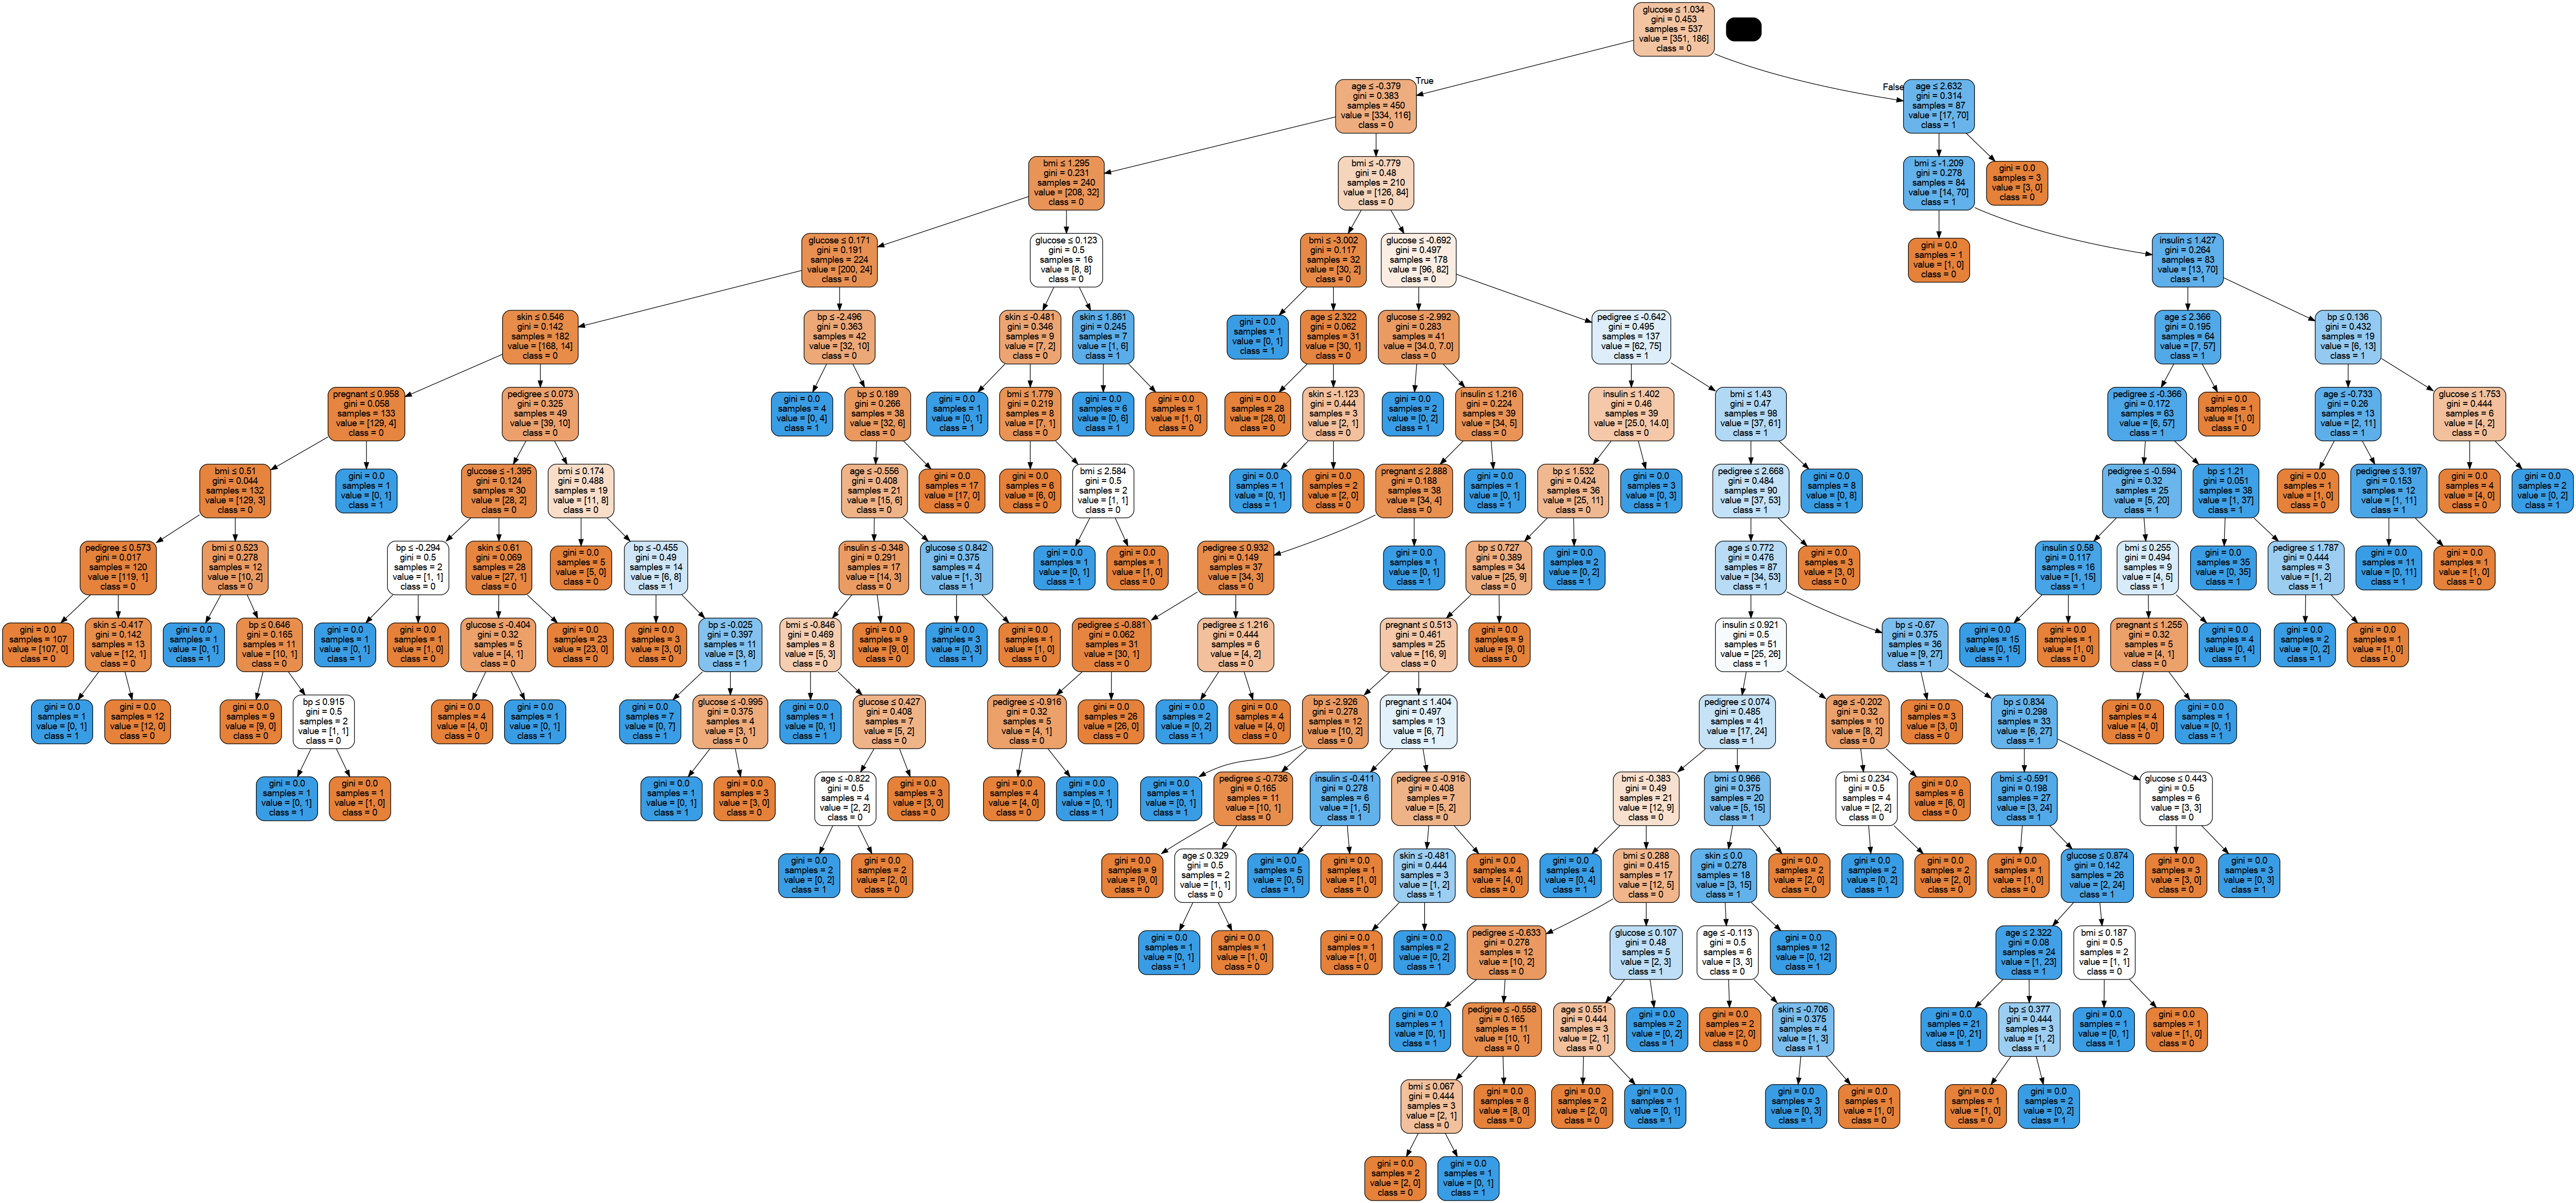

In [131]:
dot_data = StringIO()
export_graphviz(
    model,
    out_file=dot_data,
    class_names=["0", "1"],
    feature_names=X_train.columns,
    filled=True,
    rounded=True,
    special_characters=True,
)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())


## Optimizing


In [132]:
model = DecisionTreeClassifier(criterion="entropy", max_depth=3)
model.fit(X_train_scaled, y_train)

y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, y_test_pred))

print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

0.770949720670391
0.7402597402597403
              precision    recall  f1-score   support

           0       0.76      0.96      0.85       351
           1       0.85      0.41      0.56       186

    accuracy                           0.77       537
   macro avg       0.80      0.69      0.70       537
weighted avg       0.79      0.77      0.75       537

              precision    recall  f1-score   support

           0       0.73      0.95      0.83       149
           1       0.81      0.35      0.49        82

    accuracy                           0.74       231
   macro avg       0.77      0.65      0.66       231
weighted avg       0.76      0.74      0.71       231



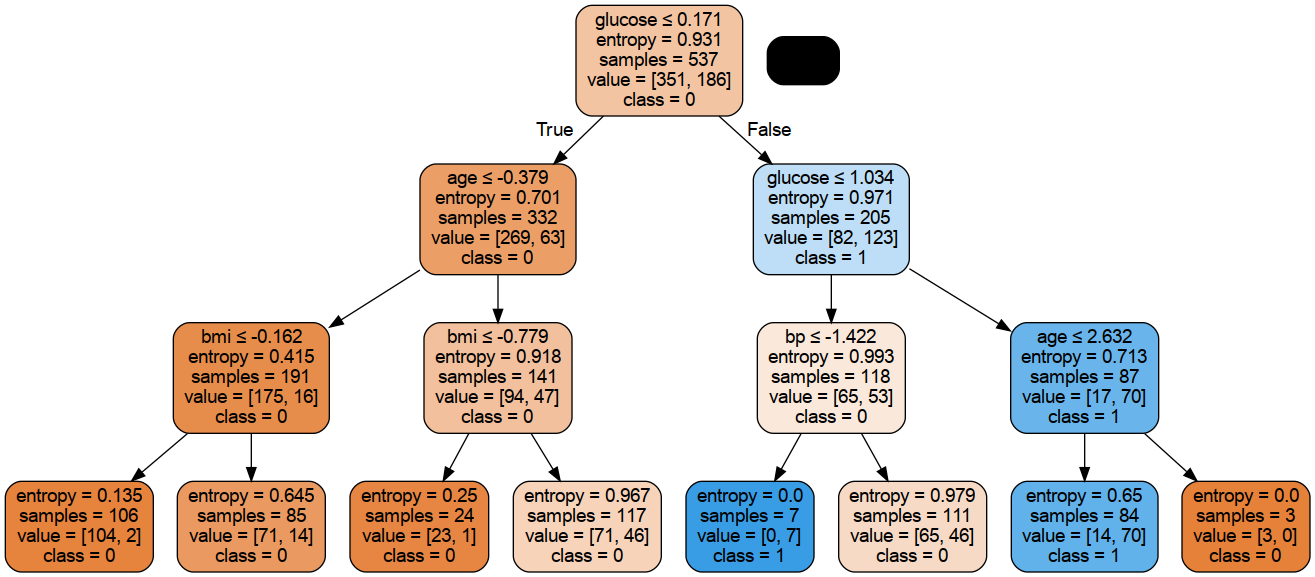

In [133]:
dot_data = StringIO()
export_graphviz(
    model,
    out_file=dot_data,
    class_names=["0", "1"],
    feature_names=X_train.columns,
    filled=True,
    rounded=True,
    special_characters=True,
)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())


# Random Forest


## Load Data


In [136]:
iris = datasets.load_iris()

In [137]:
print("Features: ", iris.feature_names)
print("Labels: ", iris.target_names)

Features:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Labels:  ['setosa' 'versicolor' 'virginica']


In [139]:
iris.data.shape

(150, 4)

In [144]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["label"] = iris.target
df["label"] = df["label"].replace(
    dict(zip(map(int, set(iris.target)), iris.target_names))
)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Data Understanding


In [146]:
df.shape

(150, 5)

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   label              150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [149]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Feature Engineering


In [150]:
X = df.drop("label", axis=1)
y = df["label"]

## Train Test Split


In [156]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

### Scaling


In [157]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train, y_train)
X_test_scaled = scaler.transform(X_test)


### Encoding


In [158]:
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

## Model Training


In [177]:
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
model.fit(X_train_scaled, y_train_encoded)

RandomForestClassifier(max_depth=5, random_state=42)

In [178]:
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

In [179]:
print(accuracy_score(y_train_encoded, y_train_pred))
print(accuracy_score(y_test_encoded, y_test_pred))

1.0
1.0


In [180]:
print(classification_report(y_train_encoded, y_train_pred))
print(classification_report(y_test_encoded, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00        37

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



# Feature Importance


In [186]:
X_train.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [183]:
model.feature_importances_

array([0.10461449, 0.04148556, 0.41732594, 0.43657401])

In [ ]:
feature_imp = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(
    ascending=False
)
feature_imp

petal width (cm)     0.436574
petal length (cm)    0.417326
sepal length (cm)    0.104614
sepal width (cm)     0.041486
dtype: float64

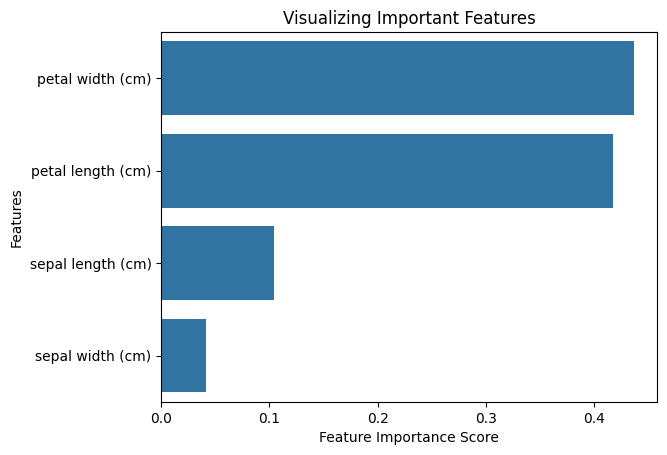

In [215]:
sns.barplot(data=feature_imp, orient="h")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing Important Features")
plt.show()

## Feature Selection


In [218]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [219]:
X = df.drop(["sepal width (cm)", "label"], axis=1)
y = df["label"]

## Train Test Split


In [220]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

### Scaling


In [221]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train, y_train)
X_test_scaled = scaler.transform(X_test)


### Encoding


In [222]:
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

## Model Training


In [ ]:
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
model.fit(X_train_scaled, y_train_encoded)

RandomForestClassifier(random_state=42)

In [229]:
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

In [230]:
print(accuracy_score(y_train_encoded, y_train_pred))
print(accuracy_score(y_test_encoded, y_test_pred))

1.0
1.0


In [231]:
print(classification_report(y_train_encoded, y_train_pred))
print(classification_report(y_test_encoded, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00        37

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



# SVM


## Load Data


In [232]:
cancer = datasets.load_breast_cancer()

In [233]:
print("Features: ", cancer.feature_names)
print("Labels: ", cancer.target_names)

Features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Labels:  ['malignant' 'benign']


In [234]:
cancer.data.shape

(569, 30)

In [240]:
def create_dataframe_from_sklearn_dataset(sklearn_dataset) -> pd.DataFrame:
    df = pd.DataFrame(sklearn_dataset.data, columns=sklearn_dataset.feature_names)
    df["label"] = sklearn_dataset.target
    df["label"] = df["label"].replace(
        dict(zip(set(sklearn_dataset.target), sklearn_dataset.target_names))
    )
    return df

In [241]:
df = create_dataframe_from_sklearn_dataset(cancer)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,malignant


## Data Understanding


In [242]:
df.shape

(569, 31)

In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [244]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [245]:
df.isna().any().any()

np.False_

## Feature Engineering


In [246]:
X = df.drop("label", axis=1)
y = df["label"]

## Train Test Split


In [247]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

### Scaling


In [248]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train, y_train)
X_test_scaled = scaler.transform(X_test)


### Encoding


In [249]:
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

## Model Training


In [251]:
model = SVC(kernel="linear", random_state=42)
model.fit(X_train_scaled, y_train_encoded)

SVC(kernel='linear', random_state=42)

In [252]:
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

In [253]:
print(accuracy_score(y_train_encoded, y_train_pred))
print(accuracy_score(y_test_encoded, y_test_pred))

0.9899497487437185
0.9766081871345029


In [254]:
print(classification_report(y_train_encoded, y_train_pred))
print(classification_report(y_test_encoded, y_test_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       249
           1       1.00      0.97      0.99       149

    accuracy                           0.99       398
   macro avg       0.99      0.99      0.99       398
weighted avg       0.99      0.99      0.99       398

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       108
           1       0.97      0.97      0.97        63

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



# Mutliple Algorithm


In [302]:
train = pd.read_csv("../data/train.csv")
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [348]:
test = pd.read_csv("../data/test.csv")
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [303]:
print(train.shape)
train.info()

(614, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [304]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [305]:
train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Clean missing values


In [306]:
num_feats = list(train.select_dtypes("number").columns)
cat_feats = list(
    train.drop(["Loan_ID", "Loan_Status"], axis=1).select_dtypes("O").columns
)
print(num_feats)
print(cat_feats)

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']


In [307]:
train[num_feats] = train[num_feats].fillna(train[num_feats].mean())
train[cat_feats] = train[cat_feats].fillna(train[cat_feats].mode().iloc[0])

In [354]:
def handle_missing_values(data, num_feats, cat_feats):
    output = data.copy()
    output[num_feats] = output[num_feats].fillna(output[num_feats].mean())
    output[cat_feats] = output[cat_feats].fillna(output[cat_feats].mode().iloc[0])
    return output

In [309]:
train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Feature Engineering


In [317]:
X_train = train[num_feats + cat_feats]
y_train = train["Loan_Status"]

In [319]:
X_train_num_feats = X_train[num_feats]
X_train_cat_feats = X_train[cat_feats]

### Label Encoding


In [322]:
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

### Scaling


In [323]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_num_feats, y_train_encoded)


### Encoding


In [325]:
ohe = OneHotEncoder(sparse_output=False)
X_train_encoded = ohe.fit_transform(X_train_cat_feats, y_train_encoded)

### Combine num and cat feats


In [333]:
X_train_combined = np.concat([X_train_scaled, X_train_encoded], axis=1)

assert X_train_combined.shape[1] == X_train_scaled.shape[1] + X_train_encoded.shape[1]

In [335]:
X_train_combined[0]

array([ 0.07299082, -0.55448733,  0.        ,  0.27985054,  0.45164045,
        0.        ,  1.        ,  1.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  0.        ,  1.        ])

In [355]:
def process_test_data(test_data, num_feats, cat_feats, scaler, ohe, le):
    test_data = handle_missing_values(test_data, num_feats, cat_feats)
    X_test_data = test_data[num_feats + cat_feats]
    X_test_data_num_feats = X_test_data[num_feats]
    X_test_data_cat_feats = X_test_data[cat_feats]
    X_test_data_scaled = scaler.transform(X_test_data_num_feats)
    X_test_data_encoded = ohe.transform(X_test_data_cat_feats)
    X_test_data_combined = np.concat([X_test_data_scaled, X_test_data_encoded], axis=1)

    assert (
        X_test_data_combined.shape[1]
        == X_test_data_scaled.shape[1] + X_test_data_encoded.shape[1]
    )
    return X_test_data_combined

In [356]:
X_test_combined = process_test_data(test, num_feats, cat_feats, scaler, ohe, le)

## Model Training


#### Logistic Regression


In [357]:
logit = LogisticRegression()
logit.fit(X_train_combined, y_train_encoded)
y_pred = logit.predict(X_train_combined)
print(classification_report(y_train_encoded, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.44      0.59       192
           1       0.79      0.98      0.88       422

    accuracy                           0.81       614
   macro avg       0.85      0.71      0.74       614
weighted avg       0.83      0.81      0.79       614



#### Decision Tree


In [346]:
dt = DecisionTreeClassifier()
dt.fit(X_train_combined, y_train_encoded)
y_pred = dt.predict(X_train_combined)
print(classification_report(y_train_encoded, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       192
           1       1.00      1.00      1.00       422

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614



#### SVM


In [347]:
svm = SVC()
svm.fit(X_train_combined, y_train_encoded)
y_pred = svm.predict(X_train_combined)
print(classification_report(y_train_encoded, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.46      0.62       192
           1       0.80      0.99      0.88       422

    accuracy                           0.82       614
   macro avg       0.87      0.72      0.75       614
weighted avg       0.85      0.82      0.80       614

